# Imports and load data:

In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [3]:
products = pd.read_csv('products.csv')
df = pd.read_csv('DF.csv')

In [4]:
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0        3376            51   140506          1          13   
1       29474             8    58308          6          16   
2       35951            99    14437          2          10   
3        8518             5   169983          0           5   
4       28398            25   147318          0           9   

   order_days_since_prior  future_buy  
0                       3           0  
1                      17           0  
2                       5           0  
3                       5           0  
4                       3           0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 7 columns):
product_id                int64
order_number              int64
user_id                   int64
order_dow                 int64
order_hour                int64
order_days_since_prior    int64
future_buy                int64
dtypes: int64(7)
memory usage: 1.7 GB


In [ ]:
prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

# functions:

In [14]:
def productId2String(x):
    return products[products['product_id']==x]['product_name'].unique()[0]
def probOfProduct(x): #for all users
    return df[df['product_id'] == x]['future_buy'].mean()

# some graphs:

**lets see what is the propapility that a user will buy the same product in the next order**

In [16]:
df['future_buy'].mean()

0.27136613744708604

**now lets see what product is most often reorderd:**

In [189]:
by_product_mean=df.groupby('product_id').mean()
by_product_mean.head()

order_number        user_id  order_dow  order_hour  \
product_id                                                       
1              19.397408  102110.286717   2.776458   13.238121   
2              25.666667   88213.355556   2.922222   13.277778   
3              17.342960  105969.884477   2.736462   12.104693   
4               9.027356  105566.811550   2.683891   13.714286   
5               8.933333  142662.533333   2.733333   10.666667   

            order_days_since_prior  future_buy  
product_id                                      
1                        31.046976    0.248380  
2                        23.466667    0.044444  
3                        34.465704    0.397112  
4                        60.361702    0.227964  
5                        38.266667    0.266667

In [190]:
by_product_mean=by_product_mean.sort(['future_buy'],ascending=False)
test=by_product_mean.head(10)
test

C:\Program Files\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


order_number        user_id  order_dow  order_hour  \
product_id                                                       
17585           3.000000   51525.000000   3.000000   13.000000   
4420            2.000000  154285.000000   4.000000   12.333333   
44822           9.600000  117037.200000   3.000000   16.200000   
15201           3.529412   56635.823529   2.705882   13.176471   
27740          38.514851   34612.752475   3.118812   14.049505   
35513           8.944444   17071.555556   3.055556    9.333333   
11802           4.941176   44745.176471   0.647059   13.470588   
20598          38.669643   27045.250000   3.250000   14.116071   
4212           10.594595  117377.972973   2.540541   14.864865   
38393          15.416667  165614.444444   3.277778   14.944444   

            order_days_since_prior  future_buy  
product_id                                      
17585                     2.000000    1.000000  
4420                    138.000000    1.000000  
44822                    18.800000    1.000000  
15201                    78.823529    0.882353  
27740                    11.356436    0.871287  
35513                    28.277778    0.833333  
11802                    57.823529    0.823529  
20598                    15.830357    0.821429  
4212                     39.918919    0.810811  
38393                    20.555556    0.805556

In [196]:
by_product_mean=by_product_mean.sort(['future_buy'],ascending=False)
test1=by_product_mean.head(10)
test=test1.rename(lambda x: productId2String(x))
test

C:\Program Files\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


order_number        user_id  \
product_id                                                                  
Raspberry Blast Fruit and Chia Seed Bar           3.000000   51525.000000   
Regular Sliced Bacon                              2.000000  154285.000000   
Cooler Ranch Tapatio Flavored Tortilla Chips      9.600000  117037.200000   
Zero Peach Nutrient Enhanced Water Beverage       3.529412   56635.823529   
Chocolate Love Bar                               38.514851   34612.752475   
Buttery Spray                                     8.944444   17071.555556   
Rosemont Crest Blend Coffee                       4.941176   44745.176471   
Thousand Island Salad Snax                       38.669643   27045.250000   
High Gravity Lager                               10.594595  117377.972973   
Condensed Soup Manhattan Clam Chowder            15.416667  165614.444444   

                                              order_dow  order_hour  \
product_id                                                            
Raspberry Blast Fruit and Chia Seed Bar        3.000000   13.000000   
Regular Sliced Bacon                           4.000000   12.333333   
Cooler Ranch Tapatio Flavored Tortilla Chips   3.000000   16.200000   
Zero Peach Nutrient Enhanced Water Beverage    2.705882   13.176471   
Chocolate Love Bar                             3.118812   14.049505   
Buttery Spray                                  3.055556    9.333333   
Rosemont Crest Blend Coffee                    0.647059   13.470588   
Thousand Island Salad Snax                     3.250000   14.116071   
High Gravity Lager                             2.540541   14.864865   
Condensed Soup Manhattan Clam Chowder          3.277778   14.944444   

                                              order_days_since_prior  \
product_id                                                             
Raspberry Blast Fruit and Chia Seed Bar                     2.000000   
Regular Sliced Bacon                                      138.000000   
Cooler Ranch Tapatio Flavored Tortilla Chips               18.800000   
Zero Peach Nutrient Enhanced Water Beverage                78.823529   
Chocolate Love Bar                                         11.356436   
Buttery Spray                                              28.277778   
Rosemont Crest Blend Coffee                                57.823529   
Thousand Island Salad Snax                                 15.830357   
High Gravity Lager                                         39.918919   
Condensed Soup Manhattan Clam Chowder                      20.555556   

                                              future_buy  
product_id                                                
Raspberry Blast Fruit and Chia Seed Bar         1.000000  
Regular Sliced Bacon                            1.000000  
Cooler Ranch Tapatio Flavored Tortilla Chips    1.000000  
Zero Peach Nutrient Enhanced Water Beverage     0.882353  
Chocolate Love Bar                              0.871287  
Buttery Spray                                   0.833333  
Rosemont Crest Blend Coffee                     0.823529  
Thousand Island Salad Snax                      0.821429  
High Gravity Lager                              0.810811  
Condensed Soup Manhattan Clam Chowder           0.805556

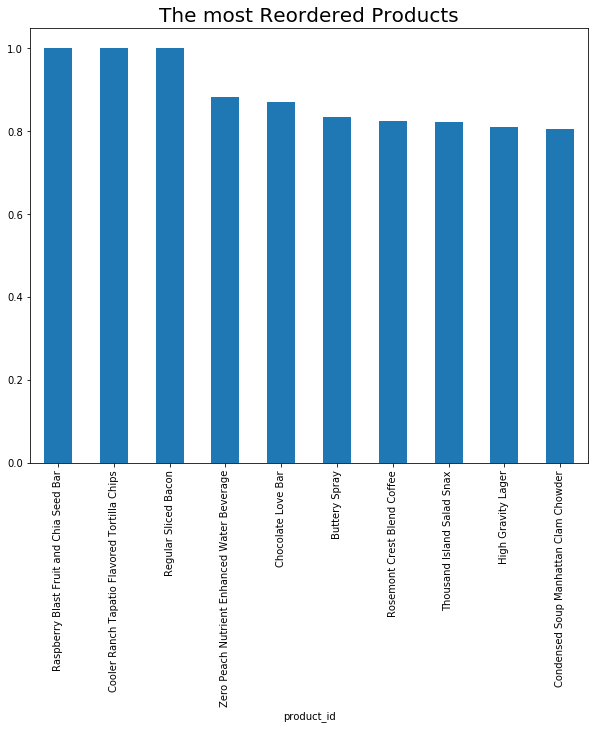

In [192]:
plt.rcParams["figure.figsize"] = [10,8]
test['future_buy'].plot.bar()
plt.title('The most Reordered Products',fontsize=20)

**now lets see how many times these products were bought:**

In [206]:
test1['times_ordered']=test1.apply(lambda x:len(df[df['product_id']==x.name]),axis=1)

C:\Program Files\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [208]:
test=test1.rename(lambda x: productId2String(x))

In [209]:
test

order_number        user_id  \
product_id                                                                  
Raspberry Blast Fruit and Chia Seed Bar           3.000000   51525.000000   
Regular Sliced Bacon                              2.000000  154285.000000   
Cooler Ranch Tapatio Flavored Tortilla Chips      9.600000  117037.200000   
Zero Peach Nutrient Enhanced Water Beverage       3.529412   56635.823529   
Chocolate Love Bar                               38.514851   34612.752475   
Buttery Spray                                     8.944444   17071.555556   
Rosemont Crest Blend Coffee                       4.941176   44745.176471   
Thousand Island Salad Snax                       38.669643   27045.250000   
High Gravity Lager                               10.594595  117377.972973   
Condensed Soup Manhattan Clam Chowder            15.416667  165614.444444   

                                              order_dow  order_hour  \
product_id                                                            
Raspberry Blast Fruit and Chia Seed Bar        3.000000   13.000000   
Regular Sliced Bacon                           4.000000   12.333333   
Cooler Ranch Tapatio Flavored Tortilla Chips   3.000000   16.200000   
Zero Peach Nutrient Enhanced Water Beverage    2.705882   13.176471   
Chocolate Love Bar                             3.118812   14.049505   
Buttery Spray                                  3.055556    9.333333   
Rosemont Crest Blend Coffee                    0.647059   13.470588   
Thousand Island Salad Snax                     3.250000   14.116071   
High Gravity Lager                             2.540541   14.864865   
Condensed Soup Manhattan Clam Chowder          3.277778   14.944444   

                                              order_days_since_prior  \
product_id                                                             
Raspberry Blast Fruit and Chia Seed Bar                     2.000000   
Regular Sliced Bacon                                      138.000000   
Cooler Ranch Tapatio Flavored Tortilla Chips               18.800000   
Zero Peach Nutrient Enhanced Water Beverage                78.823529   
Chocolate Love Bar                                         11.356436   
Buttery Spray                                              28.277778   
Rosemont Crest Blend Coffee                                57.823529   
Thousand Island Salad Snax                                 15.830357   
High Gravity Lager                                         39.918919   
Condensed Soup Manhattan Clam Chowder                      20.555556   

                                              future_buy  times_ordered  
product_id                                                               
Raspberry Blast Fruit and Chia Seed Bar         1.000000              1  
Regular Sliced Bacon                            1.000000              3  
Cooler Ranch Tapatio Flavored Tortilla Chips    1.000000              5  
Zero Peach Nutrient Enhanced Water Beverage     0.882353             17  
Chocolate Love Bar                              0.871287            101  
Buttery Spray                                   0.833333             18  
Rosemont Crest Blend Coffee                     0.823529             17  
Thousand Island Salad Snax                      0.821429            112  
High Gravity Lager                              0.810811             37  
Condensed Soup Manhattan Clam Chowder           0.805556             36

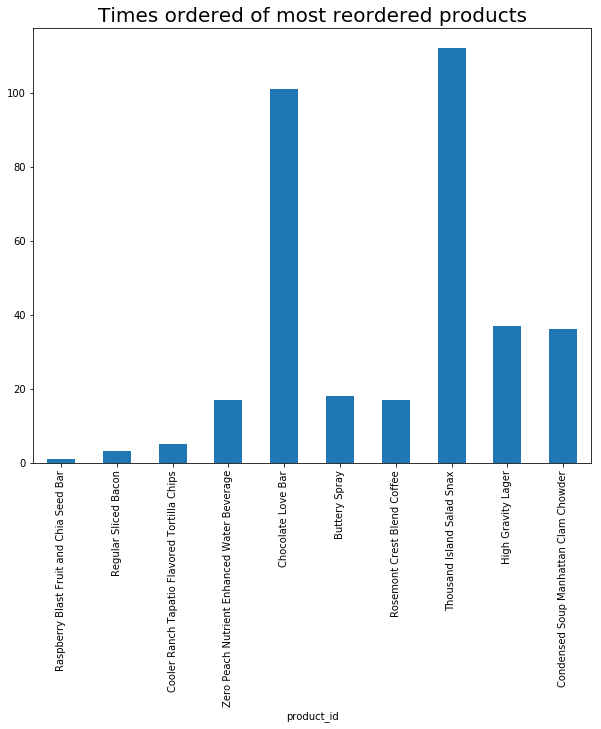

In [210]:
plt.rcParams["figure.figsize"] = [10,8]
test['times_ordered'].plot.bar()
plt.title('Times ordered of most reordered products',fontsize=20)

Days since prior - Reorder ratio:

In [211]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0        3376            51   140506          1          13   
1       29474             8    58308          6          16   
2       35951            99    14437          2          10   
3        8518             5   169983          0           5   
4       28398            25   147318          0           9   

   order_days_since_prior  future_buy  
0                       3           0  
1                      17           0  
2                       5           0  
3                       5           0  
4                       3           0

In [218]:
grouped=df.groupby('order_days_since_prior').mean().reset_index()
grouped.head()

order_days_since_prior    product_id  order_number        user_id  \
0                       0  25556.659885     27.581904  103206.770313   
1                       1  25545.593503     31.559194  103167.324708   
2                       2  25538.477165     30.551711  102519.695284   
3                       3  25519.100499     28.407431  102870.421738   
4                       4  25523.616649     25.903244  103189.531168   

   order_dow  order_hour  future_buy  
0   2.826471   14.781098    0.220462  
1   2.907561   13.677443    0.188677  
2   2.965657   13.607218    0.210847  
3   2.925300   13.483650    0.233547  
4   2.870179   13.406505    0.252586

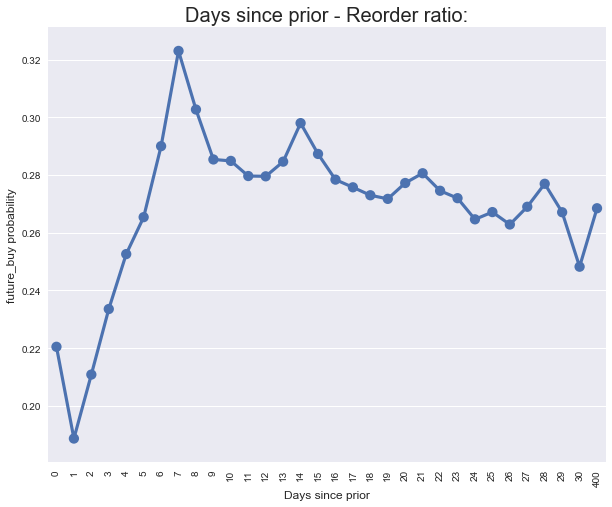

In [221]:
plt.rcParams["figure.figsize"] = [10,8]
sns.pointplot(grouped['order_days_since_prior'].values, grouped['future_buy'].values)
plt.xticks(rotation='vertical')
plt.ylabel('future_buy probability', fontsize=12)
plt.xlabel('Days since prior', fontsize=12)
plt.title('Days since prior - Reorder ratio:',fontsize=20)

# create table for word2vec:

In [32]:
#Return a list of the 2 most common products that were purchased with product_id in 50 orders
def most_common_products_purchased_with_product(product_id):
    dict_of_product_ids_occurrences=Counter()
    product_rows=df[df['product_id']==product_id]
    length=len(product_rows)
    if length>0:
        product_rows=product_rows.sample(n=min(50,length))
    for index, row in product_rows.iterrows():
        order_num=row['order_number']
        user_id=row['user_id']
        order_id1 = orders[orders['user_id']==user_id]
        order_id = order_id1[order_id1['order_number']==order_num]   
        products_in_order = prior[prior['order_id']==order_id['order_id'].unique()[0]]['product_id']
        for r in products_in_order.iteritems():
            if r[1] != product_id:
                dict_of_product_ids_occurrences[r[1]]+=1;    

    return (dict_of_product_ids_occurrences.most_common(2))

In [ ]:
start=time.time()
num_of_products=49689

        
word_col=np.repeat(np.arange(1,num_of_products), 4)
context_col = []
label_col = []

for product_id in range(1,num_of_products):
    positive=most_common_products_purchased_with_product(product_id)
    if len(positive)==0:
        index = np.argwhere(word_col==product_id)
        word_col = np.delete(word_col, index)
    else:
        context_col.append(positive[0][0])
        label_col.append(1)
        if len(positive)>1:
            context_col.append(positive[1][0])
            label_col.append(1)
        else:
            index = np.argwhere(word_col==product_id)
            word_col = np.delete(word_col, index[0])
            print('product_id - '+str(product_id)+' has only one positive example!')
        context_col.append(random.randint(1, 49688))
        label_col.append(0)
        context_col.append(random.randint(1, 49688))
        label_col.append(0)

word2vec_table = pd.DataFrame({ 'word' : word_col, 'context' : context_col, 'label' : label_col}, columns=['word', 'context', 'label'])
    
end=time.time()
print(end-start)

**save to csv:**

In [ ]:
word2vec_table.to_csv('word2vec_table.csv')

# load word2vec table:

In [7]:
word2vec = pd.read_csv('word2vec_table.csv')

In [8]:
word2vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198694 entries, 0 to 198693
Data columns (total 3 columns):
word       198694 non-null int64
context    198694 non-null int64
label      198694 non-null int64
dtypes: int64(3)
memory usage: 4.5 MB


In [10]:
word2vec.head(10)

word  context  label
0     1     6184      1
1     1    37710      1
2     1    45337      0
3     1    23457      0
4     2    13176      1
5     2    24964      1
6     2    20751      0
7     2    27158      0
8     3    24852      1
9     3    25013      1

**we still need to add to this table:**

products were never bought:

3630, 3718, 7045, 25383, 27499, 36233, 37703, 43725, 45971, 46625, 49540

products that have only one positive example:

4558 , 42206